# Final Project:                      "Clever Meal"🍎🫐🥝🥗🥘

Emojis able: ✅⚠️⁉️➡️▶️⏸️🟡🔴🥳👀🙌🏻🚀🤯

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from PIL import Image
from IPython.display import display


%matplotlib inline

In [3]:
df= pd.read_csv("All_Diets.csv")

In [4]:
df 

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


In [6]:
 df["Cuisine_type"].value_counts()

american            2907
mediterranean       1744
italian              799
french               604
world                259
british              239
mexican              224
nordic               152
south east asian     148
south american       137
asian                126
chinese              120
indian                92
middle eastern        91
eastern europe        55
japanese              50
central europe        34
caribbean             18
kosher                 7
Name: Cuisine_type, dtype: int64

In [7]:
df.isnull().any().value_counts()

False    8
dtype: int64

### ✅ Adding the Caloric Intake

In [8]:
df['Protein Calorie'] = df['Protein(g)'] * 4

In [9]:
df['Carbs Calorie'] = df['Carbs(g)'] * 4

In [10]:
df['Fat Calorie'] = df['Fat(g)'] * 4

In [11]:
df['Total Calories'] = df['Protein Calorie']+df['Carbs Calorie']+df['Fat Calorie']

### ✅ Delating innecessaries columns

In [12]:
columns_to_delete = ['Extraction_day', "Extraction_time"]
df_final = df.drop(columns=columns_to_delete)

### ✅ Save the new dataframe as a new file

In [13]:
new_file = 'all_recipes_FV.csv'
df_final.to_csv(new_file, index=False)

In [14]:
df_final

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Protein Calorie,Carbs Calorie,Fat Calorie,Total Calories
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,20.88,5.16,12.80,38.84
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,726.20,114.48,584.56,1425.24
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,123.64,1210.36,387.04,1721.04
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,38.48,303.12,239.56,581.16
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,159.36,216.32,286.20,661.88
...,...,...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,340.80,1152.56,548.60,2041.96
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,567.92,492.72,1294.00,2354.64
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,0.04,1.56,0.00,1.60
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,621.52,959.52,1043.36,2624.40


## 🚀Recipes Recommendation Model

### Unsupervised Model: ✅K-Means

### Defining our independend (X) and dependent (y) variables

In [15]:
X = df_final[["Protein(g)","Protein Calorie","Carbs(g)","Carbs Calorie", "Fat(g)", "Fat Calorie", "Total Calories"]]

In [16]:
X

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories
0,5.22,20.88,1.29,5.16,3.20,12.80,38.84
1,181.55,726.20,28.62,114.48,146.14,584.56,1425.24
2,30.91,123.64,302.59,1210.36,96.76,387.04,1721.04
3,9.62,38.48,75.78,303.12,59.89,239.56,581.16
4,39.84,159.36,54.08,216.32,71.55,286.20,661.88
...,...,...,...,...,...,...,...
7801,85.20,340.80,288.14,1152.56,137.15,548.60,2041.96
7802,141.98,567.92,123.18,492.72,323.50,1294.00,2354.64
7803,0.01,0.04,0.39,1.56,0.00,0.00,1.60
7804,155.38,621.52,239.88,959.52,260.84,1043.36,2624.40


In [17]:
df["Cuisine_type"].value_counts()

american            2907
mediterranean       1744
italian              799
french               604
world                259
british              239
mexican              224
nordic               152
south east asian     148
south american       137
asian                126
chinese              120
indian                92
middle eastern        91
eastern europe        55
japanese              50
central europe        34
caribbean             18
kosher                 7
Name: Cuisine_type, dtype: int64

In [18]:
df["Diet_type"].value_counts()

mediterranean    1753
dash             1745
vegan            1522
keto             1512
paleo            1274
Name: Diet_type, dtype: int64

##  ➡️ 1. Scaling features

### K-Means is a distance based algorithm: we need to scale / normalize!

-Scaler: <b> StandarScaler()

In [19]:
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)  # we are getting an array

# we need to get our dataframe

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)



In [20]:
X_scaled_df

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories
0,-0.868807,-0.868807,-0.811387,-0.811387,-0.934788,-0.934788,-1.173516
1,1.094964,1.094964,-0.664369,-0.664369,0.235985,0.235985,0.012409
2,-0.582700,-0.582700,0.809416,0.809416,-0.168470,-0.168470,0.265436
3,-0.819804,-0.819804,-0.410678,-0.410678,-0.470460,-0.470460,-0.709616
4,-0.483247,-0.483247,-0.527410,-0.527410,-0.374956,-0.374956,-0.640568
...,...,...,...,...,...,...,...
7801,0.021923,0.021923,0.731685,0.731685,0.162351,0.162351,0.539951
7802,0.654277,0.654277,-0.155696,-0.155696,1.688680,1.688680,0.807417
7803,-0.926830,-0.926830,-0.816229,-0.816229,-0.960998,-0.960998,-1.205371
7804,0.803511,0.803511,0.472076,0.472076,1.175453,1.175453,1.038170


#### Now, all features will have the same weight✅

# 2. Chosing k

### ➡️ Appling the Elbow Method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

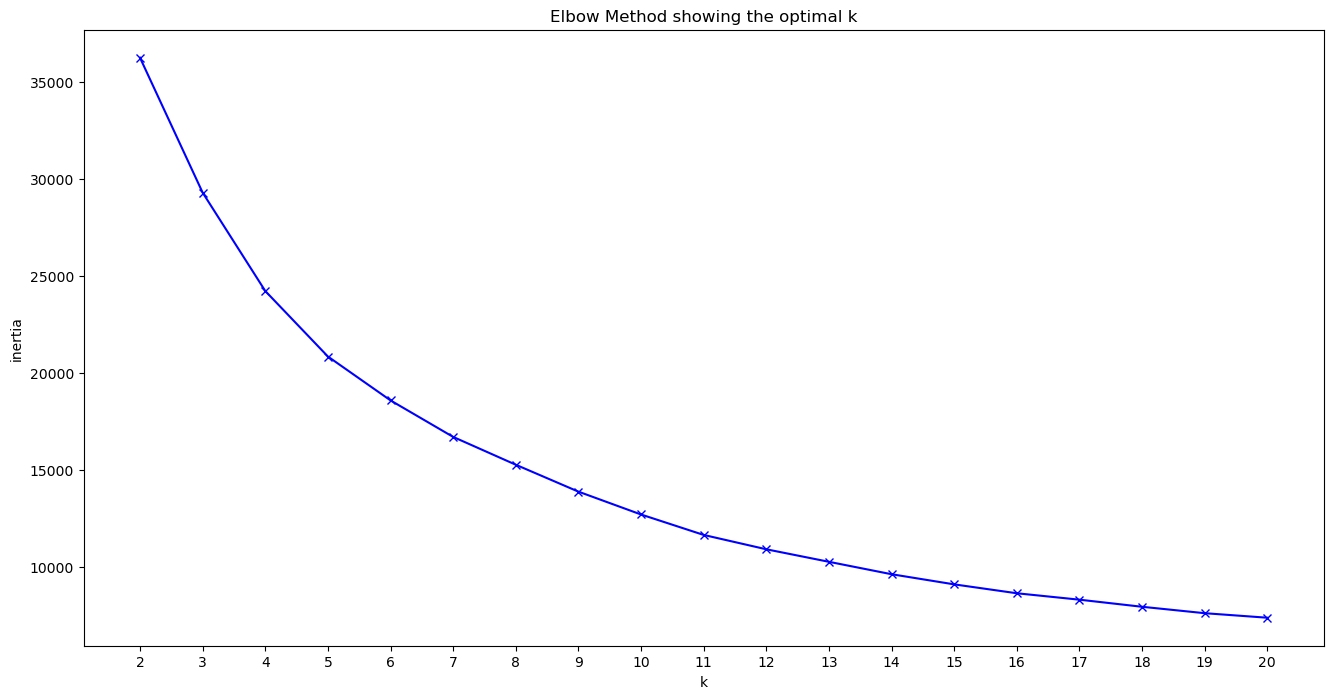

In [21]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## ➡️ Appling the Silouhette Method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

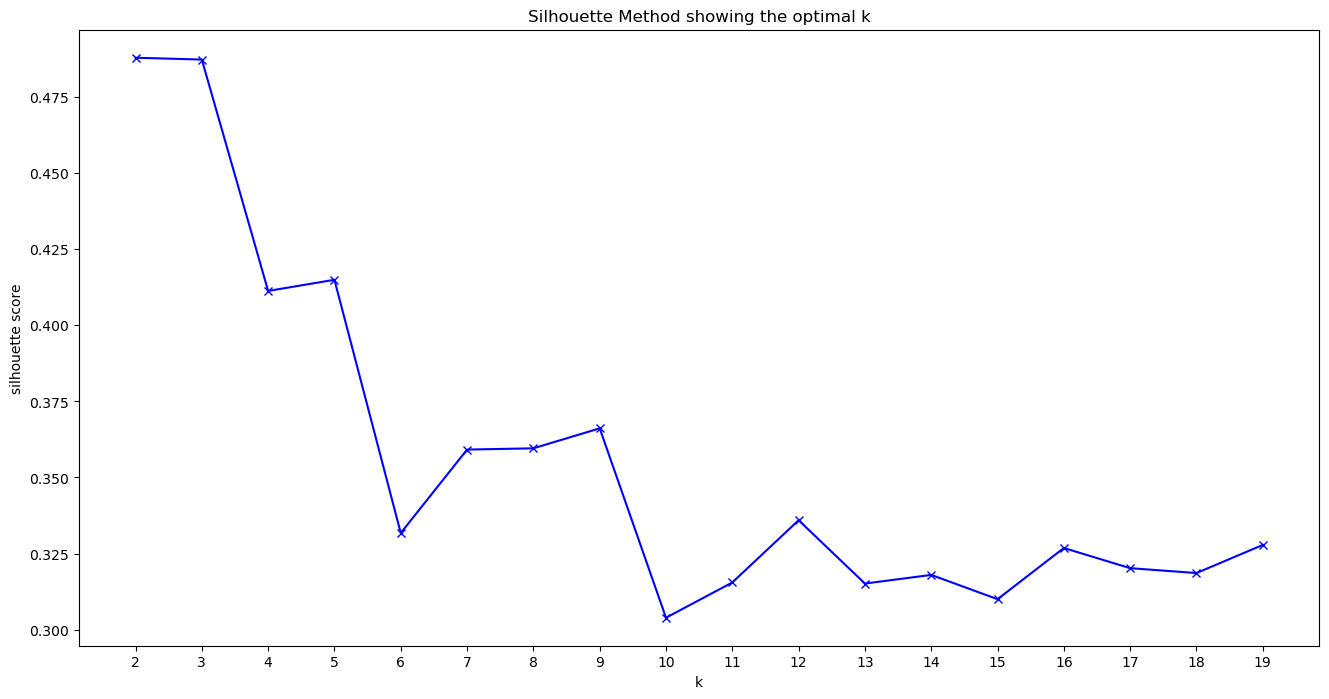

In [22]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### K= 6

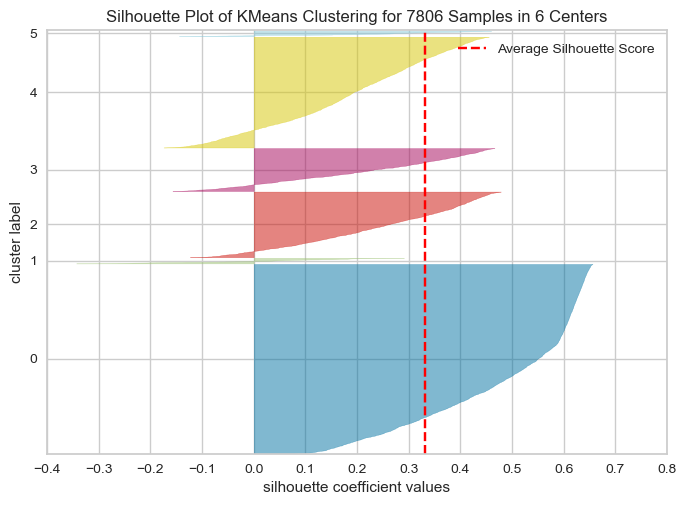

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7806 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### K= 10

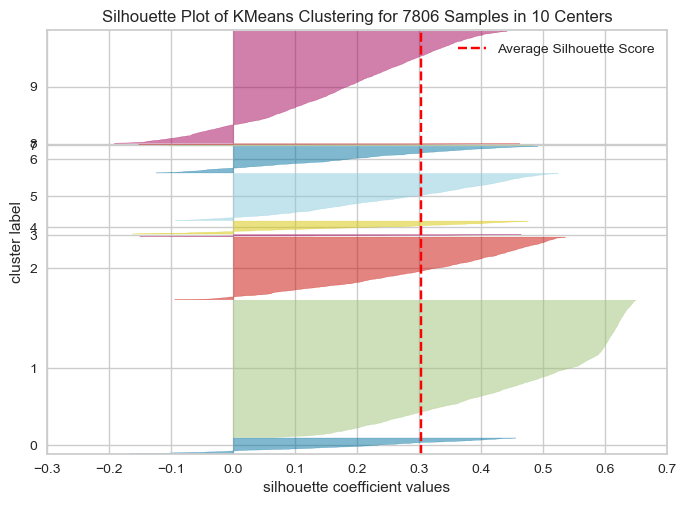

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7806 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(10, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### K= 13

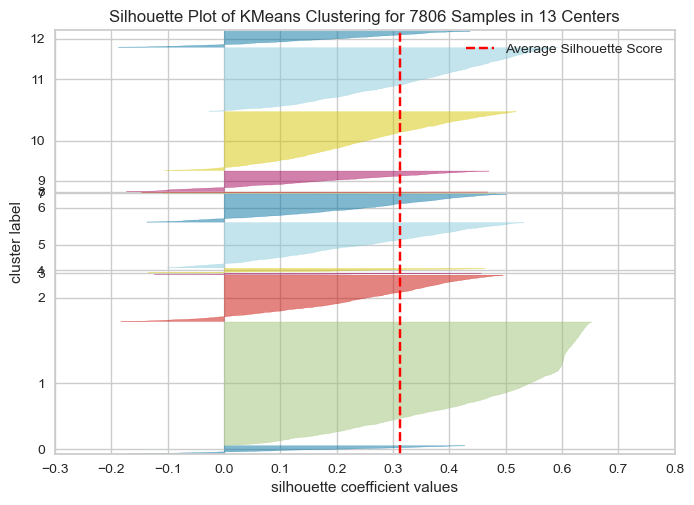

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7806 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(13, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### K= 15

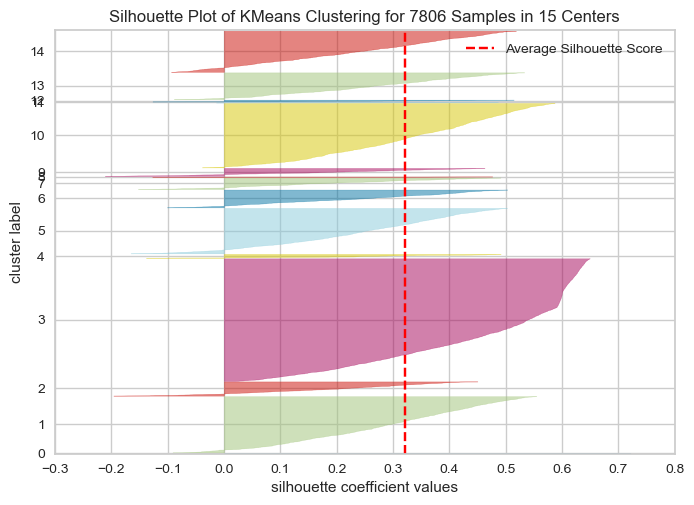

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7806 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(15, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### ➡️k=10 was chosen ✅

## 3. Creating and Fitting a  K-Means Clustering Model

###  ➡️ k-means 01

In [27]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_scaled_df)

kmeans.inertia_

12691.67116826641

In [28]:
kmeans_13 = KMeans(n_clusters=13, random_state=1234)
kmeans.fit(X_scaled_df)

kmeans.inertia_

12691.671168266412

###  ➡️ k-means 02

In [29]:
kmeans2 = KMeans(n_clusters=10,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)

kmeans2.inertia_

13307.168848330335

In [30]:
kmeans2_1 = KMeans(n_clusters=13,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)

kmeans2.inertia_

13307.168848330337

In [31]:
kmeans2 = KMeans(n_clusters=15,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)

kmeans2.inertia_

9800.33275557402

In [32]:
kmeans2 = KMeans(n_clusters=17,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)

kmeans2.inertia_

8855.760507629177

⚠️-NOTE- 
 
**Inertia** is a metric used to evaluate the quality of clustering. It represents the sum of squared distances between each data point and its nearest centroid within a cluster. Lower inertia values indicate better clustering, where data points are closer to their assigned centroids.

## 4. Let's get the labels

In [33]:
labels = kmeans.labels_
labels

array([0, 6, 9, ..., 0, 2, 0])

## 5. Now we have our "model", let's get the clusters and how many values have each clusters.

In [34]:
clusters = kmeans.predict(X_scaled_df)
clusters

#clusters
# we are counting how many songs we have for each cluster using series of operations on a pandas Series
pd.Series(clusters).value_counts().sort_index()

0    2512
1      39
2     501
3      31
4     310
5     304
6     871
7    1992
8      14
9    1232
dtype: int64

### ➡️Scatter Plot

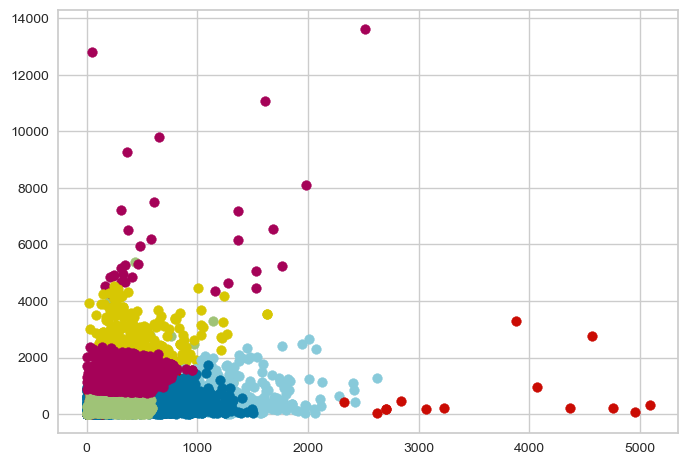

In [35]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters01 = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters01:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

### 6.  Now let's see to which group was assigned every recipe 🥝🥗🥘

In [36]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
X["cluster"] = clusters

C:\Users\espan\AppData\Local\Temp\ipykernel_9384\3748292019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


In [38]:
X

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster
0,5.22,20.88,1.29,5.16,3.20,12.80,38.84,0
1,181.55,726.20,28.62,114.48,146.14,584.56,1425.24,6
2,30.91,123.64,302.59,1210.36,96.76,387.04,1721.04,9
3,9.62,38.48,75.78,303.12,59.89,239.56,581.16,0
4,39.84,159.36,54.08,216.32,71.55,286.20,661.88,0
...,...,...,...,...,...,...,...,...
7801,85.20,340.80,288.14,1152.56,137.15,548.60,2041.96,9
7802,141.98,567.92,123.18,492.72,323.50,1294.00,2354.64,2
7803,0.01,0.04,0.39,1.56,0.00,0.00,1.60,0
7804,155.38,621.52,239.88,959.52,260.84,1043.36,2624.40,2


In [39]:
X[X['cluster'] == 3].sample()

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster
2136,55.36,221.44,1063.72,4254.88,621.42,2485.68,6962.0,3


In [40]:
X[X['cluster'] == 3]

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster
8,152.88,611.52,1874.52,7498.08,385.80,1543.20,9652.80,3
325,77.32,309.28,1801.16,7204.64,887.91,3551.64,11065.56,3
467,496.20,1984.80,2023.05,8092.20,211.10,844.40,10921.40,3
526,145.04,580.16,1545.27,6181.08,177.40,709.60,7470.84,3
990,92.97,371.88,1628.09,6512.36,195.87,783.48,7667.72,3
1351,41.75,167.00,1133.70,4534.80,415.07,1660.28,6362.08,3
1412,76.80,307.20,1295.31,5181.24,756.82,3027.28,8515.72,3
1466,12.72,50.88,3204.43,12817.72,53.92,215.68,13084.28,3
1509,101.45,405.80,1210.44,4841.76,371.51,1486.04,6733.60,3
1517,120.61,482.44,1486.52,5946.08,685.22,2740.88,9169.40,3


## 7. Preparing everything to be able to get the user input

### Creating the Final dataframe with Recipes and Cluster 👀

⚠️ Can I add also the diet and Cuisine type?

In [41]:
df_fv = pd.merge(X, df[['Recipe_name', "Cuisine_type","Diet_type"]], left_index=True, right_index=True)

In [42]:
#df_fv = pd.merge(X, df[['Recipe_name']], left_index=True, right_index=True)

In [43]:
df_fv 

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster,Recipe_name,Cuisine_type,Diet_type
0,5.22,20.88,1.29,5.16,3.20,12.80,38.84,0,Bone Broth From 'Nom Nom Paleo',american,paleo
1,181.55,726.20,28.62,114.48,146.14,584.56,1425.24,6,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,paleo
2,30.91,123.64,302.59,1210.36,96.76,387.04,1721.04,9,Paleo Pumpkin Pie,american,paleo
3,9.62,38.48,75.78,303.12,59.89,239.56,581.16,0,Strawberry Guacamole recipes,mexican,paleo
4,39.84,159.36,54.08,216.32,71.55,286.20,661.88,0,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,paleo
...,...,...,...,...,...,...,...,...,...,...,...
7801,85.20,340.80,288.14,1152.56,137.15,548.60,2041.96,9,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,dash
7802,141.98,567.92,123.18,492.72,323.50,1294.00,2354.64,2,Make-Your-Own-Salad,american,dash
7803,0.01,0.04,0.39,1.56,0.00,0.00,1.60,0,Luis Buñuel Dry Martini,world,dash
7804,155.38,621.52,239.88,959.52,260.84,1043.36,2624.40,2,Cornflake Semi-Fried Chicken Tenders,american,dash


### ---------------------------------------------------------------------------------------------------------------------------

In [44]:
df_fv[df_fv['cluster'] == 0]

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster,Recipe_name,Cuisine_type,Diet_type
0,5.22,20.88,1.29,5.16,3.20,12.80,38.84,0,Bone Broth From 'Nom Nom Paleo',american,paleo
3,9.62,38.48,75.78,303.12,59.89,239.56,581.16,0,Strawberry Guacamole recipes,mexican,paleo
4,39.84,159.36,54.08,216.32,71.55,286.20,661.88,0,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,paleo
5,68.62,274.48,34.15,136.60,42.44,169.76,580.84,0,Paleo Shrimp-Stuffed Mushrooms recipes,mediterranean,paleo
7,4.25,17.00,14.15,56.60,72.90,291.60,365.20,0,Autoimmune Paleo Pesto,italian,paleo
...,...,...,...,...,...,...,...,...,...,...,...
7795,1.20,4.80,6.82,27.28,0.43,1.72,33.80,0,Bloody Mary recipes,world,dash
7798,0.03,0.12,2.95,11.80,0.01,0.04,11.96,0,Manhattan,world,dash
7800,0.05,0.20,15.26,61.04,0.03,0.12,61.36,0,No Man's Land,world,dash
7803,0.01,0.04,0.39,1.56,0.00,0.00,1.60,0,Luis Buñuel Dry Martini,world,dash


In [45]:
# Find the minimum value in the column
min_value = df_fv[df_fv['cluster']==0].min()

In [46]:
min_value 

Protein(g)                            0.0
Protein Calorie                       0.0
Carbs(g)                             0.06
Carbs Calorie                        0.24
Fat(g)                                0.0
Fat Calorie                           0.0
Total Calories                       0.24
cluster                                 0
Recipe_name        "Fruit Cocktail" Crisp
Cuisine_type                     american
Diet_type                            dash
dtype: object

In [47]:
# Find the maximum value in the column
max_value = df_fv[df_fv['cluster']==0].max()

In [48]:
max_value

Protein(g)                                                111.82
Protein Calorie                                           447.28
Carbs(g)                                                  258.75
Carbs Calorie                                             1035.0
Fat(g)                                                    134.38
Fat Calorie                                               537.52
Total Calories                                           1114.72
cluster                                                        0
Recipe_name        {Vegan} Peanut Butter & Honey Muffins recipes
Cuisine_type                                               world
Diet_type                                                  vegan
dtype: object

In [49]:
df_fv[df_fv['cluster'] == 1]

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster,Recipe_name,Cuisine_type,Diet_type
183,105.25,421.00,594.23,2376.92,700.42,2801.68,5599.60,1,Paleo Pecan Pie Bars recipes,american,paleo
283,27.93,111.72,87.43,349.72,751.19,3004.76,3466.20,1,A No Bake Paleo Chocolate Cashew Coconut Desse...,american,paleo
621,109.85,439.40,1343.97,5375.88,1869.58,7478.32,13293.60,1,Paleo Blondies,american,paleo
627,37.60,150.40,30.65,122.60,877.40,3509.60,3782.60,1,Paleo Calamari,italian,paleo
923,52.77,211.08,543.93,2175.72,1094.53,4378.12,6764.92,1,Paleo Pita Crisps,mediterranean,paleo
939,286.58,1146.32,822.40,3289.60,979.01,3916.04,8351.96,1,Paleo Chocolate Chippers,french,paleo
1128,120.47,481.88,462.74,1850.96,758.62,3034.48,5367.32,1,Paleo Carrot Cake,french,paleo
1238,115.42,461.68,15.53,62.12,1305.07,5220.28,5744.08,1,Paleo Greek Roasted Lamb,mediterranean,paleo
1396,50.97,203.88,1002.35,4009.40,676.53,2706.12,6919.40,1,Chocolate Chip Cake with Buttercream Icing (Ve...,american,vegan
1471,32.89,131.56,192.70,770.80,911.66,3646.64,4549.00,1,Vegan Cassoulet,american,vegan


In [50]:
max_value = df_fv[df_fv['cluster']==1].max()

In [51]:
max_value

Protein(g)                                                  329.78
Protein Calorie                                            1319.12
Carbs(g)                                                   1343.97
Carbs Calorie                                              5375.88
Fat(g)                                                     1930.24
Fat Calorie                                                7720.96
Total Calories                                             13293.6
cluster                                                          1
Recipe_name        Wildly Interesting Wild Mushroom & Arugula Tart
Cuisine_type                                      south east asian
Diet_type                                                    vegan
dtype: object

In [52]:
df_fv[df_fv['cluster'] == 2]

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster,Recipe_name,Cuisine_type,Diet_type
27,17.85,71.40,215.69,862.76,304.25,1217.00,2151.16,2,Banana Cream Pie,american,paleo
30,87.32,349.28,258.25,1033.00,259.21,1036.84,2419.12,2,Paleo Honey Cake,eastern europe,paleo
41,87.32,349.28,258.25,1033.00,259.24,1036.96,2419.24,2,Paleo Honey Cake,american,paleo
43,85.97,343.88,271.68,1086.72,207.57,830.28,2260.88,2,Paleo Fruitcake recipes,american,paleo
45,123.47,493.88,75.65,302.60,235.87,943.48,1739.96,2,Perfect Paleo Pizza,italian,paleo
...,...,...,...,...,...,...,...,...,...,...,...
7789,155.38,621.52,239.88,959.52,260.84,1043.36,2624.40,2,Cornflake Semi-Fried Chicken Tenders,american,dash
7796,137.16,548.64,27.73,110.92,516.80,2067.20,2726.76,2,Pimento Cheese Sandwiches,american,dash
7799,165.34,661.36,209.29,837.16,431.44,1725.76,3224.28,2,Neelys Egg Benedict on a Pork Croquette,italian,dash
7802,141.98,567.92,123.18,492.72,323.50,1294.00,2354.64,2,Make-Your-Own-Salad,american,dash


In [53]:
df_fv[df_fv['cluster'] == 3]

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster,Recipe_name,Cuisine_type,Diet_type
8,152.88,611.52,1874.52,7498.08,385.80,1543.20,9652.80,3,Baked Banana Chip Encrusted French Toast,french,paleo
325,77.32,309.28,1801.16,7204.64,887.91,3551.64,11065.56,3,Paleo Chocolate Sweet Potato Bread (gluten and...,american,paleo
467,496.20,1984.80,2023.05,8092.20,211.10,844.40,10921.40,3,"Pad Thai Recipe (Grain-Free, Paleo, Gluten Free)",south east asian,paleo
526,145.04,580.16,1545.27,6181.08,177.40,709.60,7470.84,3,Chocolate Caramel Chia Pudding,british,paleo
990,92.97,371.88,1628.09,6512.36,195.87,783.48,7667.72,3,Paleo Blueberry Bars,american,paleo
1351,41.75,167.00,1133.70,4534.80,415.07,1660.28,6362.08,3,Vegan Creme Brulee Buttermilk Cupcakes,american,vegan
1412,76.80,307.20,1295.31,5181.24,756.82,3027.28,8515.72,3,Vegan Chocolate Cake and Frosting recipes,american,vegan
1466,12.72,50.88,3204.43,12817.72,53.92,215.68,13084.28,3,Summer Baked Beans recipes,american,vegan
1509,101.45,405.80,1210.44,4841.76,371.51,1486.04,6733.60,3,Vegan Christmas cake,american,vegan
1517,120.61,482.44,1486.52,5946.08,685.22,2740.88,9169.40,3,Vegan Chocolate Ganache Cupcakes with Salted C...,american,vegan


In [54]:
max_value = df_fv[df_fv['cluster']==3].max()

In [55]:
max_value

Protein(g)                         628.29
Protein Calorie                   2513.16
Carbs(g)                          3405.55
Carbs Calorie                     13622.2
Fat(g)                             887.91
Fat Calorie                       3551.64
Total Calories                    17470.4
cluster                                 3
Recipe_name        Vegan Pinto Bean Chili
Cuisine_type             south east asian
Diet_type                           vegan
dtype: object

In [56]:
max_value = df_fv[df_fv['cluster']==4].max()

In [57]:
max_value

Protein(g)                                         407.45
Protein Calorie                                    1629.8
Carbs(g)                                          1131.87
Carbs Calorie                                     4527.48
Fat(g)                                             554.46
Fat Calorie                                       2217.84
Total Calories                                     6290.8
cluster                                                 4
Recipe_name        Who Cares Vegan Mac and Cheese recipes
Cuisine_type                             south east asian
Diet_type                                           vegan
dtype: object

In [58]:
max_value = df_fv[df_fv['cluster']==5].max()

In [59]:
max_value

Protein(g)                                                   656.65
Protein Calorie                                              2626.6
Carbs(g)                                                     659.32
Carbs Calorie                                               2637.28
Fat(g)                                                       717.47
Fat Calorie                                                 2869.88
Total Calories                                              6363.28
cluster                                                           5
Recipe_name        “Pho” Slow Cooker Pulled Pork Sandwiches recipes
Cuisine_type                                       south east asian
Diet_type                                                     vegan
dtype: object

### ---------------------------------------------------------------------------------------------------------------------------

In [60]:
df_fv.to_csv("all_recipes_clustering_family_recipes.csv", index=False)

In [91]:
user_data = []  # List to store user inputs

calories_per_meal = float(input("Enter your desired calory per meal: "))
carb_per_meal_gr = float(input("Enter your desired carb(gr) per meal: "))
carb_per_meal_calories = float(input("Enter your desired calory carb per meal: "))
protein_per_meal_gr  = float(input(f"Enter your desired prot(gr) per meal: "))
protein_per_meal_calories = float(input("Enter your desired carb(gr) per meal: "))
fat_per_meal_gr= float(input(f"Enter your desired fat(gr) per meal:: "))
fat_per_meal_calories= float(input(f"Enter your desired fat(gr) per meal:: "))

# Append the user inputs as a dictionary to the user_data list
user_data.append({
            'Calories per meal': calories_per_meal,
            'Carbohidrato(gr)': carb_per_meal_gr,
            'Carbohidrato(calories)': carb_per_meal_calories,
            'Protein(gr)': protein_per_meal_gr,
            'Protein(calories)': protein_per_meal_calories,
            'Fat(gr)': fat_per_meal_gr,
            'Fat(calories)': fat_per_meal_calories,
             
        })
        
user_inputs_df = pd.DataFrame(user_data)

Enter your desired calory per meal: 600
Enter your desired carb(gr) per meal: 90
Enter your desired calory carb per meal: 100
Enter your desired prot(gr) per meal: 200
Enter your desired carb(gr) per meal: 100
Enter your desired fat(gr) per meal:: 25
Enter your desired fat(gr) per meal:: 14


#### user_inputs_df

In [92]:
# Scaling the user inputs DataFrame

scaler = StandardScaler()
scaler.fit(user_inputs_df)
scaler.transform(user_inputs_df)
user_inputs_scaled = scaler.transform(user_inputs_df)

# Apply KMeans prediction to user_inputs_scaled

user_cluster = kmeans.predict(user_inputs_scaled)

# Filter recommended recipe based on predicted cluster

recommended_recipe_from_cluster = df_fv[df_fv['cluster'] == user_cluster[0]]

# Select a random recipe from recommended recipes
recommended_recipe = recommended_recipe_from_cluster.sample(n=1)


C:\Users\espan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [93]:
recommended_recipe

,Protein(g),Protein Calorie,Carbs(g),Carbs Calorie,Fat(g),Fat Calorie,Total Calories,cluster,Recipe_name,Cuisine_type,Diet_type
5969,88.45,353.8,159.05,636.2,41.17,164.68,1154.68,7,Mediterranean Shrimp Wraps,mediterranean,mediterranean


In [81]:
def get_user_inputs():
    
    user_data = []  # List to store user inputs

    calories_per_meal = float(input("Enter your desired calory per meal: "))
    carb_per_meal_gr = float(input("Enter your desired carb(gr) per meal: "))
    carb_per_meal_calories = float(input("Enter your desired calory carb per meal: "))
    protein_per_meal_gr  = float(input(f"Enter your desired prot(gr) per meal: "))
    protein_per_meal_calories = float(input("Enter your desired carb(gr) per meal: "))
    fat_per_meal_gr= float(input(f"Enter your desired fat(gr) per meal:: "))
    fat_per_meal_calories= float(input(f"Enter your desired fat(gr) per meal:: "))
    
    
    # Append the user inputs as a dictionary to the user_data list
    user_data.append({
            'Calories per meal': calories_per_meal,
            'Carbohidrato(gr)': carb_per_meal_gr,
            'Carbohidrato(calories)': carb_per_meal_calories,
            'Protein(gr)': protein_per_meal_gr,
            'Protein(calories)': protein_per_meal_calories,
            'Fat(gr)': fat_per_meal_gr,
            'Fat(calories)': fat_per_meal_calories,
             
        })
    
    user_inputs_df = pd.DataFrame(user_data)
    
    return user_df

In [82]:
def get_recipe_recommendation():
    
    
    # Scaling the user inputs DataFrame

    scaler = StandardScaler()
    scaler.fit(user_inputs_df)
    scaler.transform(user_inputs_df)
    user_inputs_scaled = scaler.transform(user_inputs_df)

    # Apply KMeans prediction to user_inputs_scaled

    user_cluster = kmeans.predict(user_inputs_scaled)

    # Filter recommended recipe based on predicted cluster

    recommended_recipe_from_cluster = df_fv[df_fv['cluster'] == user_cluster[0]]

    # Select a random recipe from recommended recipes
    recommended_recipe = recommended_recipe_from_cluster.sample(n=1)
    
    return recommended_recipe

In [83]:
def get_recipe_recommendation():
    
    
    # Scaling the user inputs DataFrame

    scaler = StandardScaler()
    scaler.fit(get_recipe_recommendation())
    scaler.transform(get_recipe_recommendation())
    user_inputs_scaled = scaler.transform(get_recipe_recommendation())

    # Apply KMeans prediction to user_inputs_scaled

    user_cluster = kmeans.predict(user_inputs_scaled)

    # Filter recommended recipe based on predicted cluster

    recommended_recipe_from_cluster = df_fv[df_fv['cluster'] == user_cluster[0]]

    # Select a random recipe from recommended recipes
    recommended_recipe = recommended_recipe_from_cluster.sample(n=1)
    
    return recommended_recipe